# Max C6 ratio for Na and Cs

13 January 2026

Santi

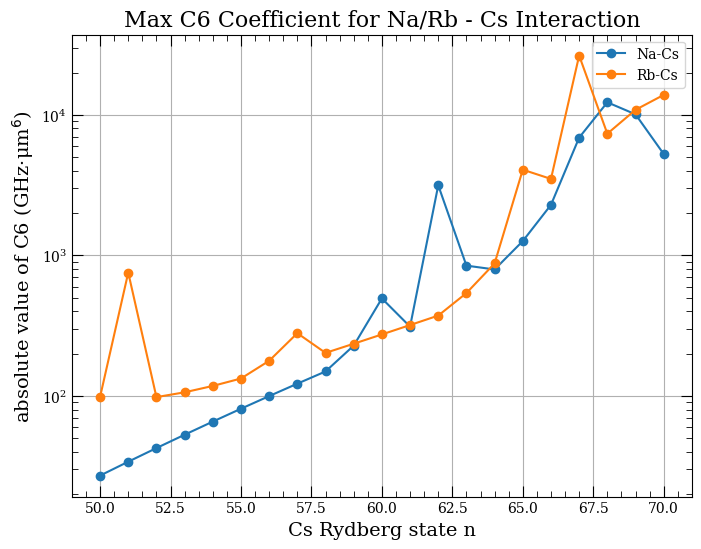

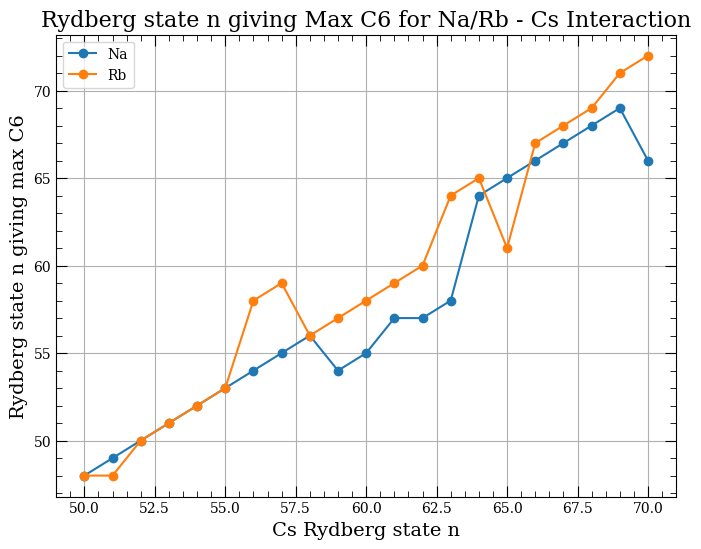

From above, we want to set Cs = 62 and Na = 57

In [1]:
# import two_atom_interaction.py
from two_atom_interaction import *
# keep track of time
import time

In [19]:
## Na - Cs
# first checking without squeezing what is the position and momentum spread
pixel_to_um = 1 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# pixel_to_um = 0.87

# Experiment configuration
cfg = ExperimentConfig(

    n_atom1 = 57,#51,  # Na Rydberg n
    n_atom2 = 62, #54,  # Cs Rydberg n

    R_mean_um = 5,#10.8 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = (0.5)*1e6,  # Rb Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive] - just prepare Cs in Rydberg
    t_pi_atom2_us = 1/(0.5*1e6) * 1e6, # time to do pi pulse on atom2 (us)

    Delta_scan_Hz = np.linspace(200, 300, 50) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    # T_uK_atom1 = (2.0, 2.0, 2.0), #(2.0, 2.0, 2.0), # 2.0
    # T_uK_atom2 = (2.0, 2.0, 2.0), #(1.0, 1.0, 1.0), # 1.0

    # T_uK_atom1 = (18.0, 18.0, 18.0), #(2.0, 2.0, 2.0), # 2.0
    # T_uK_atom2 = (30.0, 30.0, 30.0), #(1.0, 1.0, 1.0), # 1.0

    T_uK_atom1 = (0.0, 0.0, 0.0), #(2.0, 2.0, 2.0), # 2.0
    T_uK_atom2 = (0.0, 0.0, 0.0), #(1.0, 1.0, 1.0), # 1.0

    # These are the *ground-state* trap 20e3 of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (280e3, 280e3, 40e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (110e3, 110e3, 20e3),

    load_factor = np.sqrt(1),  # % of trap depth after dropping

    T2_atom1_s = 20e-6, # coherence time for Rb
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 10,  # number of Monte Carlo samples per detuning
    N_steps = 10,  # number of time steps in evolution

    load_depth_T_atom1 = 380, # uK
    load_depth_T_atom2 = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
    simulate_atom1_recapture=True,
    simulate_atom2_recapture=True,

    squeeze_factor1 = (1.0, 1.0, 1.0),  # atom1 squeezing factor for each axis(1 = no squeezing)
    squeeze_factor2 = (1.0, 1.0, 1.0),  # atom2 squeezing factor for each axis(1 = no squeezing)
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
# c6 = 100*10**10 # for testing purposes
print(f"C6 (Na 57S - Cs 62S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 57S - Cs 62S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -3151.5648781247414 GHz·μm^6
C6 (Na 57S - Cs 62S) = 1.980e+13 rad/s·μm^6
C6 (Na 57S - Cs 62S) = 3151.565 GHz·μm^6
time for C6 calculation: 0.1 s


Starting detuning scan...
  Point 2/50 - Elapsed: 0.0s, Est. remaining: 0.3s
  Point 4/50 - Elapsed: 0.0s, Est. remaining: 0.4s
  Point 6/50 - Elapsed: 0.1s, Est. remaining: 0.4s
  Point 8/50 - Elapsed: 0.1s, Est. remaining: 0.5s
  Point 10/50 - Elapsed: 0.1s, Est. remaining: 0.5s
  Point 12/50 - Elapsed: 0.2s, Est. remaining: 0.5s
  Point 14/50 - Elapsed: 0.2s, Est. remaining: 0.6s
  Point 16/50 - Elapsed: 0.3s, Est. remaining: 0.6s
  Point 18/50 - Elapsed: 0.3s, Est. remaining: 0.6s
  Point 20/50 - Elapsed: 0.4s, Est. remaining: 0.6s
  Point 22/50 - Elapsed: 0.5s, Est. remaining: 0.6s
  Point 24/50 - Elapsed: 0.5s, Est. remaining: 0.6s
  Point 26/50 - Elapsed: 0.6s, Est. remaining: 0.6s
  Point 28/50 - Elapsed: 0.7s, Est. remaining: 0.6s
  Point 30/50 - Elapsed: 0.8s, Est. remaining: 0.5s
  Point 32/50 - Elapsed: 0.9s, Est. remaining: 0.5s
  Point 34/50 - Elapsed: 1.0s, Est. remaining: 0.5s
  Point 36/50 - Elapsed: 1.1s, Est. remaining: 0.4s
  Point 38/50 - Elapsed: 1.2s, Est. remain

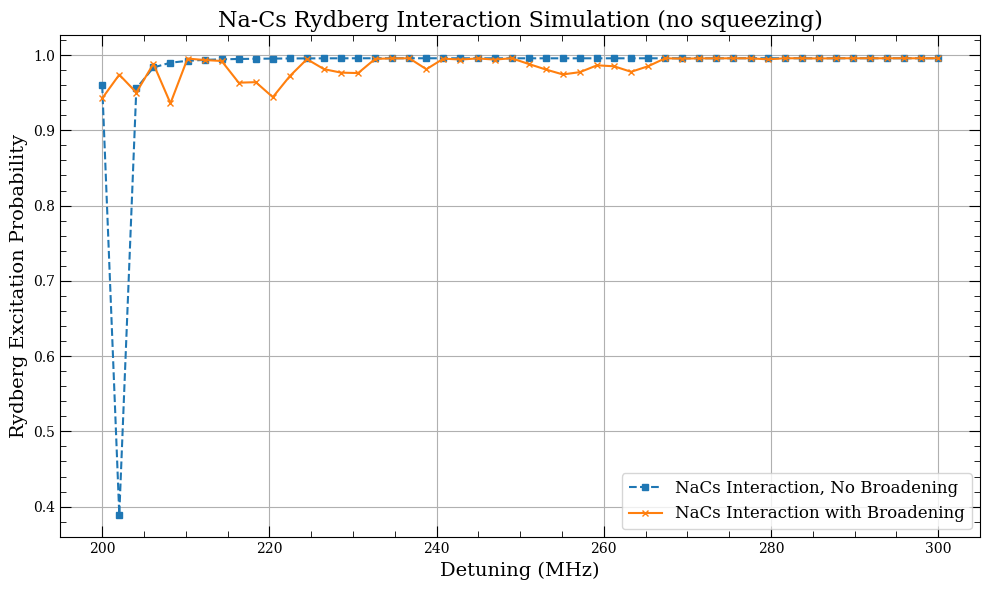

In [20]:
# ---------------------------------
# Main simulation
# ---------------------------------

# (B) without interaction
# start_time = time.time()
# d, P_no = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=False)
# print(f"time for (B) without interaction: {time.time() - start_time:.1f} s")

# (C) without broadening
start_time = time.time()
d, P_no_broad_NaCs = scan_detuning(ExperimentConfig(**{**cfg.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
print(f"time for (C) without broadening: {time.time() - start_time:.1f} s")

# (A) with interaction
start_time = time.time()
d, P_int_NaCs = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")

print("Simulation done.")

# Plotting
plt.figure(figsize=(10,6))
# plt.plot(d / 1e6, P_no, '-', label='(B) No Interaction', markersize=5)
plt.plot(d / 1e6, P_no_broad_NaCs, 's--', label='NaCs Interaction, No Broadening', markersize=5)
plt.plot(d / 1e6, P_int_NaCs, 'x-', label='NaCs Interaction with Broadening', markersize=5)
plt.xlabel('Detuning (MHz)', fontsize=14)
plt.ylabel('Rydberg Excitation Probability', fontsize=14)
plt.title('Na-Cs Rydberg Interaction Simulation (no squeezing)', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

Saved images for different states

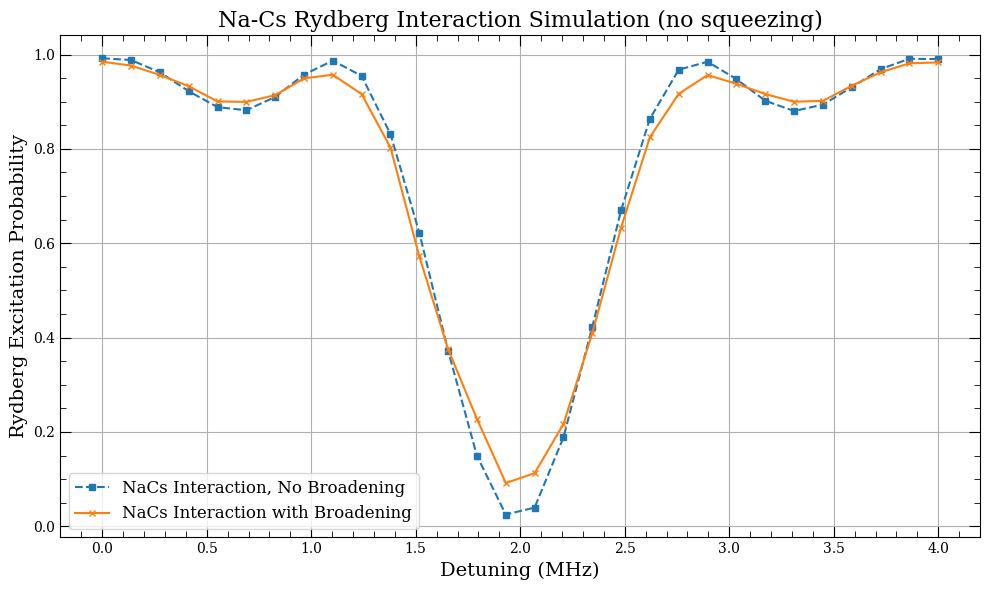

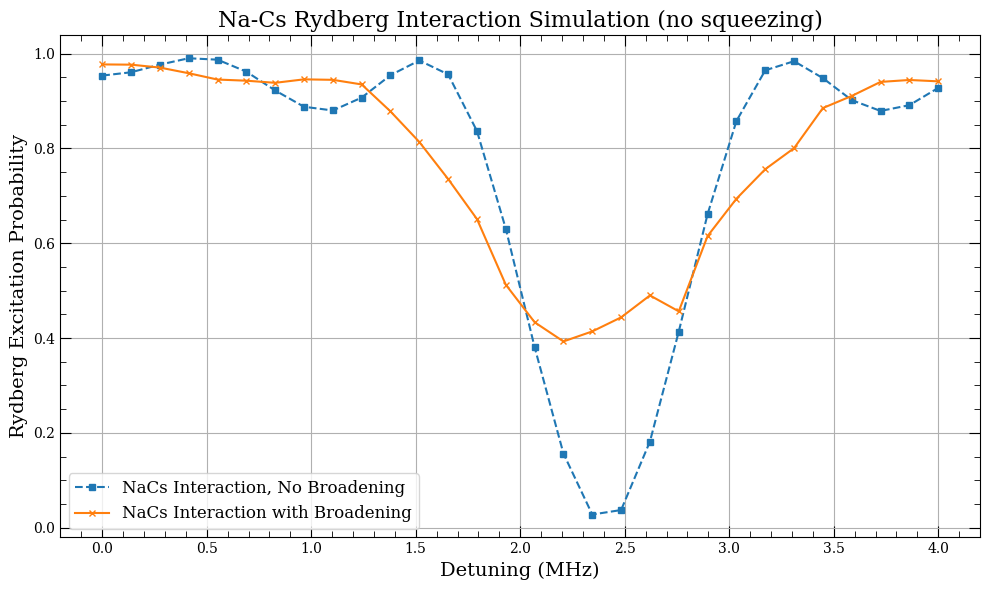

# Checking with exact diagonalization.


Calculating Hamiltonian matrix...


	matrix (dimension  3072 )

Matrix R3 100.0 % (state 708 of 708)



Diagonalizing interaction matrix...

99%c6 =  408.6839670330352  GHz /R^6 (mu m)^6
offset =  0.00442751936785892


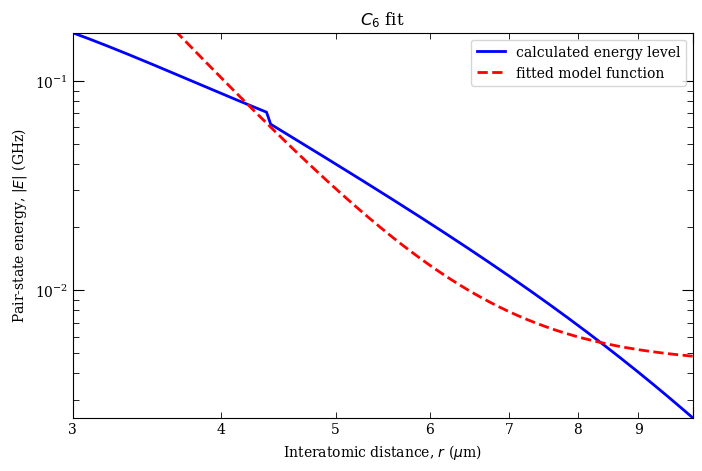

In [2]:
# check the C6 coefficient value with exact diagonalization using ARC
atom1 = Sodium()
atom2 = Cesium()
n_atom1 = 57
l_atom1 = 0
j_atom1 = 0.5
n_atom2 = 62
l_atom2 = 0
j_atom2 = 0.5


# Build inter-species pair-state calculation
calc = PairStateInteractions(
    atom1, n_atom1, l_atom1, j_atom1,
    n_atom2, l_atom2, j_atom2,
    m1=0.5, m2=0.5, atom2=atom2
)
calc.defineBasis(0, 0, 5, 5, 25e9, progressOutput=True)
r = np.linspace(3, 10, 200)
calc.diagonalise(r, 250, progressOutput=True)

# ARC returns C6 typically as frequency×μm^6 (e.g., GHz·μm^6). Convert to Hz·μm^6 then to rad/s·μm^6.
c6_freq_um6 = calc.getC6fromLevelDiagram(3, 10, showPlot=True)
c6_Hz_um6 = c6_freq_um6 * 1.0e9  # GHz -> Hz if needed by ARC version
c6_rad_um6 = TWOPI * c6_Hz_um6   # Hz -> rad/s

In [4]:
print(f"Exact Diagonalization C6 (Na {n_atom1}S - Cs {n_atom2}S) = {c6_rad_um6:.3e} rad/s·μm^6")
print("Exact Diagonalization C6 (Na %dS - Cs %dS) = %.3f GHz·μm^6" % (n_atom1, n_atom2, c6_rad_um6 / (2*np.pi*1e9)))

Exact Diagonalization C6 (Na 57S - Cs 62S) = 2.568e+12 rad/s·μm^6
Exact Diagonalization C6 (Na 57S - Cs 62S) = 408.684 GHz·μm^6
